## Business Problem

PowerCo is an electricity and gas utility company that is concerned about losing customers. There are reasons why a customer would decide to churn. These could include the gas or electricity cost, response time a customer's complain is resolved by customer support, location of the business, income level of the customer, quality of service provided by PowerCo, etc. 

In this notebook, we explore the price and client's dataset. The price dataset contains information about gas and electricity prices for each customer per month of the year, while the clients dataset contains information about the quantity of electricity and gas used by customers over the past 12 months (used and forecasted), channel from which customer pay for utility, the number of active products etc. During exploration, we perform some data quality and integrity check and preliminary data exploration and visualisation to understand the content of the datasets. Based on the insight obtained, data preprocessing technique will be performed to prepare the data to a suitable format for modelling.

## __Package and datasets Loading__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
price = pd.read_csv('price_data.csv')
clients = pd.read_csv('client_data.csv')

## __Exploratory Data Analysis__

In [3]:
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [4]:
clients.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
price.shape, clients.shape

((193002, 8), (14606, 26))

### __Data quality checks__

__Missing values and duplicate rows__

In [ ]:
price.info()

In [ ]:
clients.info()

In [ ]:
# missing values
price.isna().sum()

In [ ]:
clients.isna().sum()

In [ ]:
# checking for duplicate rows
clients.duplicated().sum(), price.duplicated().sum()

__Data types__

In [6]:
price.dtypes

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

In [7]:
clients.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

### __Descriptive statistics__

In [8]:
price.select_dtypes('number').describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [9]:
price.describe(exclude='number')

,id,price_date
count,193002,193002
unique,16096,12
top,038af19179925da21a25619c5a24b745,2015-08-01
freq,12,16094


In [10]:
clients.select_dtypes('number').describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [11]:
clients.describe(exclude='number')

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,has_gas,origin_up
count,14606,14606,14606,14606,14606,14606,14606,14606
unique,14606,8,1796,368,2129,386,2,6
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2009-08-01,2016-02-01,2015-11-01,2015-06-23,f,lxidpiddsbxsbosboudacockeimpuepw
freq,1,6754,95,145,721,587,11955,7097


## __Data Visualisation__

### __Customer churn vs customer retention__

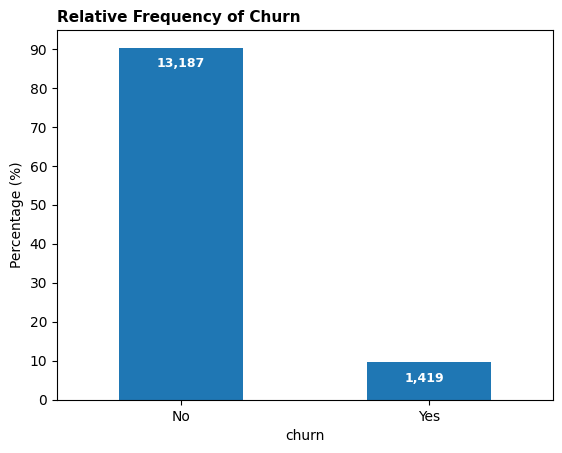

In [12]:
# number of churn customers

ax = clients.churn.value_counts(normalize=True).plot(kind='bar', rot=0)
for i in ax.patches:
    val = i.get_height()*len(clients)
    plt.text(i.get_x()+.15, i.get_height()-.05, f'{val:,.0f}', 
             fontweight='bold', color='white', fontsize=9)

plt.title('Relative Frequency of Churn', loc='left', fontsize=11, fontweight='bold')
plt.xticks(range(2), ['No', 'Yes'])
plt.yticks(np.arange(0,1,0.1), (100*np.arange(0,1,0.1)).astype(int))
plt.ylabel('Percentage (%)')
plt.show()

- There are 1,419 clients who have churned with over 13,000 who haven't. This represents about 10% of churned clients.

### __Customer churn by sales channels__

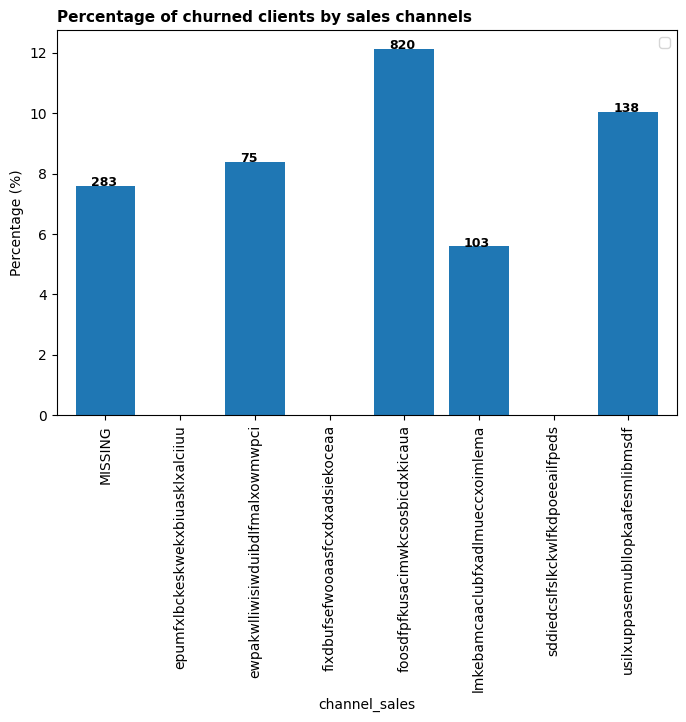

In [13]:
# proportion of clients who have churned by channel sales
channels = np.sort(clients.channel_sales.unique())
ax = (
    clients.groupby(['churn', 'channel_sales']).churn.count()
    .unstack(0).fillna(0)
    .apply(lambda x: 100*x/x.sum(), axis=1)
    .reset_index()
    .rename({0:'churn_No', 1:'churn_Yes'}, axis=1)
    .iloc[:, [0,2]]
    .plot(kind='bar', x='channel_sales', y='churn_Yes', width=0.8, figsize=(8,5))
)

for i, j in zip(channels, ax.patches):
    val = sum(clients.query(f"channel_sales == '{i}'").churn == 1)
    if val > 0:
        plt.text(j.get_x()+0.2, j.get_height(), f'{val:.0f}', fontsize=9, fontweight='bold', color='k')
    else: continue

plt.ylabel('Percentage (%)')
plt.title('Percentage of churned clients by sales channels', loc='left', fontweight='bold', fontsize=11)
plt.legend([])
plt.show()

- 12.1% of clients who purchased from channel 5 (from left), have churned. That is 820 clients. This is followed by 10% of clients who purchased from channel 8 (138)

### __Customer churn by tenure (number of years with PowerCo)__

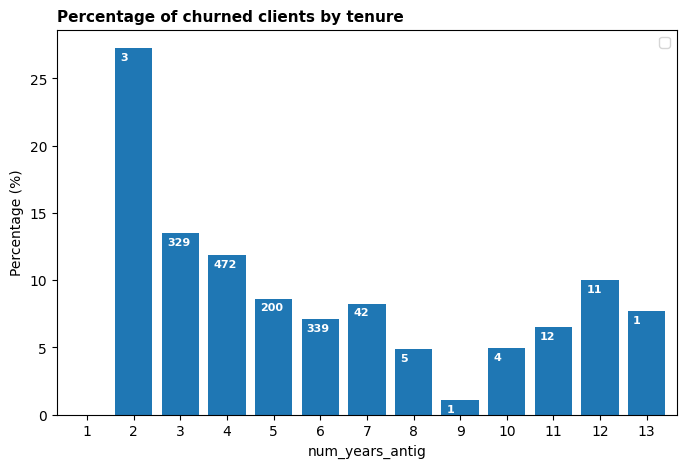

In [14]:
# who churn? old or new customers?
tenure = np.sort(clients.num_years_antig.unique())

ax = (
    clients
    .groupby(['num_years_antig', 'churn']).churn.count()
    .unstack(1)
    .fillna(0)
    .apply(lambda x: 100*x/x.sum(), axis=1)
    .rename({0:'churn_no', 1:'churn_yes'}, axis=1)
    .reset_index()
    .iloc[:, [0,2]]
    .plot(kind='bar', x='num_years_antig', y='churn_yes', rot=0, width=0.8, figsize=(8,5))
)


for j, i in zip(tenure, ax.patches):
    val = sum(clients.query(f"num_years_antig == {j}").churn == 1)
    if val > 0:
        plt.text(i.get_x()+0.11, i.get_height()-.9, f'{val:.0f}', fontsize=8, fontweight='bold', color='w')
    else: continue

plt.ylabel('Percentage (%)')
plt.title('Percentage of churned clients by tenure', loc='left', fontweight='bold', fontsize=11)
plt.legend([])
plt.show()

- Newer customers have a high chance of churning than long-existing clients
- Customers whose subscription is between 2-6 years have a high chance of churning. These customers make up over 90% of the customers who have churned. 25% of those who have stayed 2 years (3 customers) have churned, about 7-15% of customers who have stayed between 3 and 6 years have churned
- No new customers (<=1 years).
- Customers who have stayed longer (>= 8 years) have less chance of churning.

### __Gas and electricity consumption__

- Percentage of customers with or without gas and electricity by churn status
- Churn by electricity and gas consumption vs cost

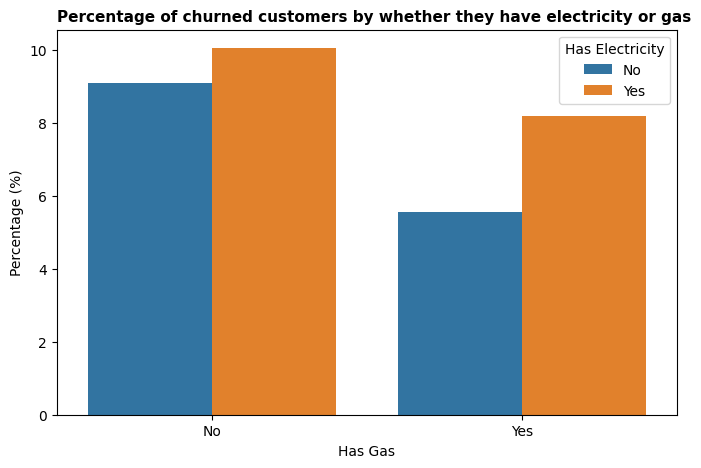

In [15]:
# who do churn? Gas subscribers or electricity subscribers
gas_elect = (
    clients
    .assign(has_elect = np.where((clients.cons_12m + clients.cons_last_month) > 0, 'Yes', 'No'))
    .groupby(['has_gas',  'has_elect', 'churn']).churn.count()
    .unstack(2)
    .apply(lambda x: 100*x/x.sum(), axis=1)
    .rename({0:'churn_no', 1:'churn_yes'}, axis=1)
    .iloc[:, 1]
    .reset_index()
)

plt.figure(figsize=(8,5))
ax = sns.barplot(data=gas_elect, x='has_gas', y='churn_yes', hue='has_elect')
plt.title('Percentage of churned customers by whether they have electricity or gas', 
          fontsize=11, fontweight='bold', loc='left')
plt.ylabel('Percentage (%)')
plt.xlabel('Has Gas')
plt.xticks(range(2), ['No', 'Yes'])
plt.legend(title='Has Electricity')
plt.show()

- There's almost equal percentage of churned customers who either have gas, electricity or both who have churned

### __Average Electricity vs gas consumption by churn status__

In [16]:
# heavy consumers
total_elect_consumption = clients[['id', 'cons_12m', 'cons_last_month']].set_index('id').sum(axis=1).to_frame(name='tot_elect_cons')
total_gas_consumption = clients[['id', 'cons_gas_12m']].set_index('id')

consumption = (
    pd.concat([total_elect_consumption, total_gas_consumption, clients[['id', 'churn']].set_index('id')], axis=1)
    .rename({'cons_gas_12m':'tot_gas_cons'}, axis=1)
)

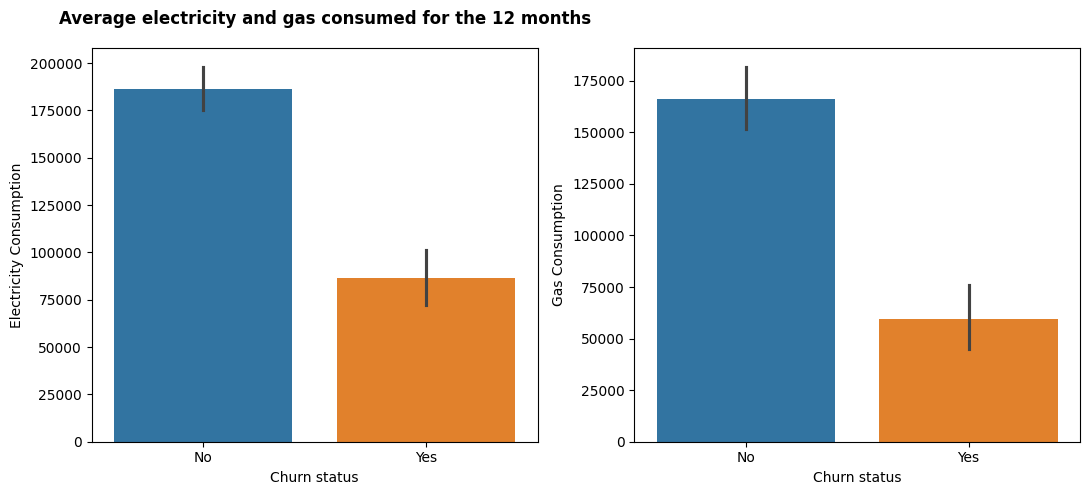

In [17]:
fig, ax = plt.subplots(1,2,figsize=(11,5))

sns.barplot(data=consumption.query('tot_elect_cons > 0'), 
            x='churn', y='tot_elect_cons', hue='churn', ax=ax[0], legend=False)
sns.barplot(data=consumption.query('tot_gas_cons > 0'), 
            x='churn', y='tot_gas_cons', hue='churn', ax=ax[1], legend=False)
ax[0].set(ylabel='Electricity Consumption', xlabel='Churn status')
ax[1].set(ylabel='Gas Consumption', xlabel='Churn status')
ax[0].set_xticks(range(2), ['No', 'Yes'])
ax[1].set_xticks(range(2), ['No', 'Yes'])
fig.suptitle('Average electricity and gas consumed for the 12 months', x=0.3, fontweight='bold')
fig.tight_layout()
plt.show()

- Customers who churned are mostly customers that consumed low units of electricity and gas
- Churned customers consumed an average of 80 KW in electricity and an average of 60 cubic feets of gas in 12 months.
- This may indicate that the size of the business or income level of the business or individual may affect churn. Probably, they couldn't afford the prices of gas or electricity

### __Average Electricity vs gas cost by churn status__

In [18]:
# merge electricity and gas consumption with price of energy or power
price_consumption = consumption.merge(price.drop('price_date', axis=1).groupby('id').mean(), on='id')

In [19]:
# customer electricity and gas costs during peak, mid peak and off-peak periods
customer_prices = pd.concat(
    [
        pd.DataFrame(price_consumption.tot_gas_cons.values.reshape(-1,1) * price_consumption.filter(regex='var').values, 
                     columns=[f'gas_{i}' for i in price_consumption.filter(regex='var').columns], 
                     index=price_consumption.index),
        pd.DataFrame(price_consumption.tot_elect_cons.values.reshape(-1,1) * price_consumption.filter(regex='fix').values,
                     columns=[f'elect_{i}' for i in price_consumption.filter(regex='fix').columns], 
                     index=price_consumption.index)
    ], axis=1
)

In [20]:
# merge customer consumption and energy prices into one dataframe
df = (
    price_consumption
    .merge(customer_prices, on='id')
    .filter(regex='elect|gas|churn')
    .melt(['tot_elect_cons', 'tot_gas_cons', 'churn'], var_name='name', value_name='price')
    )

df['name'] = df.name.str.replace('_var|_fix', '', regex=True)

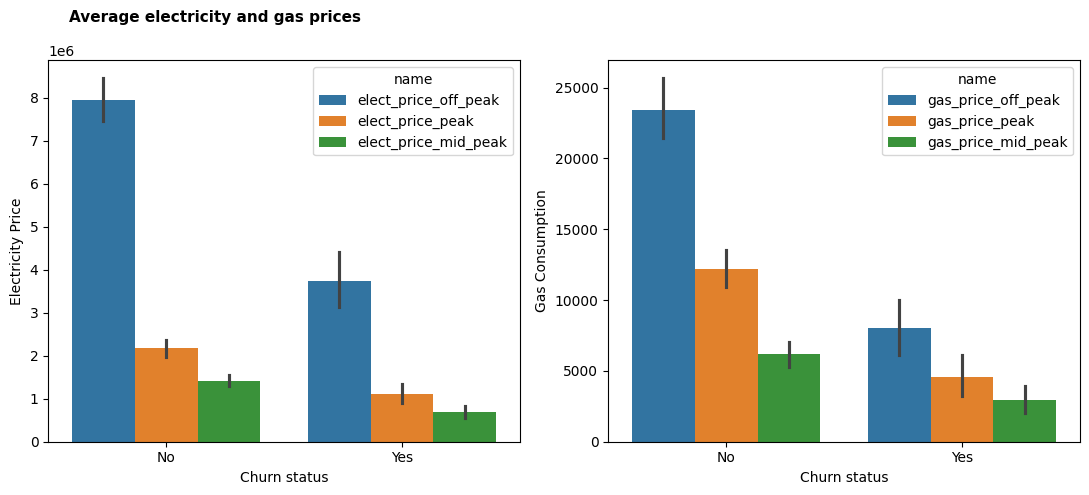

In [21]:
fig, ax = plt.subplots(1,2,figsize=(11,5))

sns.barplot(data=df[df.name.str.contains('elect')].query('tot_elect_cons > 0'), estimator='mean',
            x='churn', y='price', hue='name', ax=ax[0])
sns.barplot(data=df[df.name.str.contains('gas')].query('tot_gas_cons > 0'), estimator='mean',
            x='churn', y='price', hue='name', ax=ax[1])

ax[0].set(ylabel='Electricity Price', xlabel='Churn status')
ax[1].set(ylabel='Gas Consumption', xlabel='Churn status')
ax[0].set_xticks(range(2), ['No', 'Yes'])
ax[1].set_xticks(range(2), ['No', 'Yes'])
fig.suptitle('Average electricity and gas prices', x=0.2, fontweight='bold', fontsize=11)
fig.tight_layout()
plt.show()

- During off periods (low demand), electricity cost is higher than either during peak or mid-peak periods
- Similar thing we saw in electricity and gas consumption. Low-electrcity users are likely to churn. Do we provide an incentive to them to retain them?

### __Number of Active products and services__

<positron-console-cell-23>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<positron-console-cell-23>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


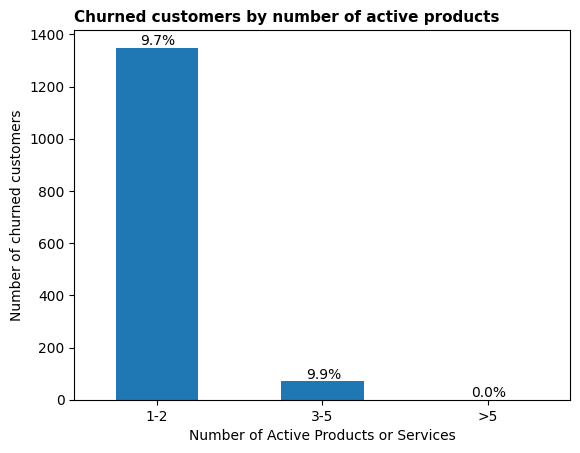

In [23]:
df = (
    clients
    .assign(nb_prod_gp = pd.cut(clients.nb_prod_act, [-1, 2, 5, 40], labels=['1-2', '3-5', '>5']))
    .groupby(['nb_prod_gp', 'churn']).churn.count()
    .unstack(1)
    .fillna(0)
    .rename({0:'churn_no', 1:'churn_yes'}, axis=1)
)

df = df.assign(perc_churn = df.apply(lambda x: 100*x/x.sum(), axis=1).iloc[:, 1])

ax = df.plot(kind='bar', y='churn_yes', rot=0, ylabel='Number of churned customers', 
             xlabel='Number of Active Products or Services', legend=False)
plt.title('Churned customers by number of active products', fontweight='bold', loc='left', fontsize=11)

for a, i in enumerate(ax.patches):
    val = df.perc_churn[a]
    plt.annotate(f'{val:.1f}%', (i.get_x()+.15, i.get_height()+10))

- The number of active products may be a way of determining those who are likely to churn
- From above, about 9.7 % (about 1400) of customers with 1 or 2 active products or services have churned. This is similar to the 9.9% (about 140) of those with 3-5 active products while for those with more than 5 active products or services, none have churned.

## __Conclusion__

- From exploration, one reason why customers may have churned could be the cost of the services or product. Companies with fewer gas or electricity consumption have churned. 
- From findings, the number of active products a customer has may be a determinant of churn. Customers with 1 to 5 active products have a higher chance of exiting unlike those with more than 5 products. It is likely that customers with more than 5 active products are larger sized companies or companies with higher returns
- Similarly, long-term customers of PowerCO have a less chance of exiting compared to newly existing customers or customers who have stayed between 3 and 6 years.
- Finally, the sales channel from which a customer joined PowerCO may be a reason why customers may be leaving. Probably, the customer service in those channels may be responsible?